In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv('potato_NO_OUTLIERS.csv')

In [2]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%Y-%m-%d")
df = df.set_index("DATE")

In [3]:
df[df.index.duplicated(keep=False)]

,Unnamed: 0,MODAL
DATE,,


In [4]:
df = df[~df.index.duplicated(keep='first')]

In [5]:
df[df.index.duplicated(keep=False)]

,Unnamed: 0,MODAL
DATE,,


In [6]:
df = df.resample('1D').interpolate(mehod= "linear")

In [7]:
window_size = 7
data = df.rolling(window_size).mean()

In [8]:
for i in range(window_size):
    data['MODAL'][i] = df['MODAL'][i]
df = data

In [9]:
df = df.reset_index()

<AxesSubplot:ylabel='MODAL'>

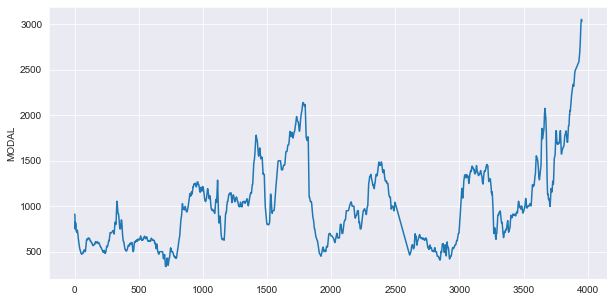

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(10,5))
sns.lineplot(data= df['MODAL'], ax= axes)

In [11]:
start_idx = df.index[df.DATE == '2012-01-01'][0]
end_idx = df.index[df.DATE == '2019-12-31'][0] + 1
data = df[start_idx:end_idx]
data = data.reset_index()
data

,index,DATE,Unnamed: 0,MODAL
0,730,2012-01-01,727.0,358.163265
1,731,2012-01-02,728.0,367.346939
2,732,2012-01-03,729.0,377.551020
3,733,2012-01-04,730.0,388.775510
4,734,2012-01-05,731.0,401.020408
...,...,...,...,...
2917,3647,2019-12-27,3644.0,1741.071429
2918,3648,2019-12-28,3645.0,1741.071429
2919,3649,2019-12-29,3646.0,1751.785714
2920,3650,2019-12-30,3647.0,1766.071429


In [12]:
# df[df['DATE'] == data['DATE'][start_idx] - relativedelta(years=1)]
col = 'DATE'
one_year = []
second_year = []
for i in range(0, len(data[col])):
    diff1 = data[col][i] - relativedelta(years = 1)
    diff2 = data[col][i] - relativedelta(years = 2)
    if diff1 in df.values:
        one_year.append(df.loc[df[col] == diff1, 'MODAL'].iloc[0])
    else:
        one_year.append(None)
    if diff2 in df.values:
        second_year.append(df.loc[df[col] == diff2, 'MODAL'].iloc[0])
    else:
        second_year.append(None)

In [13]:
data = data.assign(one_year = one_year, second_year = second_year)

In [14]:
data.isnull().values.any()

False

In [15]:
df = data.drop(['index', 'DATE'], axis = 1)

In [16]:
col = df.columns
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data = x_scaled, columns = col)
df

,Unnamed: 0,MODAL,one_year,second_year
0,0.000000,0.000000,0.282458,0.318850
1,0.000342,0.005156,0.280193,0.318850
2,0.000685,0.010885,0.276579,0.308583
3,0.001027,0.017187,0.259691,0.228940
4,0.001369,0.024062,0.249781,0.270565
...,...,...,...,...
2917,0.998631,0.776425,0.177970,0.092454
2918,0.998973,0.776425,0.174005,0.080561
2919,0.999315,0.782441,0.170041,0.068668
2920,0.999658,0.790461,0.165510,0.060739


In [17]:
train_set, test_set = train_test_split(df,test_size=0.20,random_state=42)
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set['MODAL']
X_test = test_set.drop('MODAL', 1)

In [18]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 0.20489683168322553 Mean of MODAL: 0.3691817699553031
R2 score is 0.06217686813187384


In [19]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING:
Root MSE of the model: 0.20519239236951917 Mean of MODAL: 0.3692615314125927
R2 score is 0.059740387193207956


In [20]:
data

,index,DATE,Unnamed: 0,MODAL,one_year,second_year
0,730,2012-01-01,727.0,358.163265,846.428571,912.000000
1,731,2012-01-02,728.0,367.346939,842.346939,912.000000
2,732,2012-01-03,729.0,377.551020,835.836735,893.500000
3,733,2012-01-04,730.0,388.775510,805.408163,750.000000
4,734,2012-01-05,731.0,401.020408,787.551020,825.000000
...,...,...,...,...,...,...
2917,3647,2019-12-27,3644.0,1741.071429,658.163265,504.081633
2918,3648,2019-12-28,3645.0,1741.071429,651.020408,482.653061
2919,3649,2019-12-29,3646.0,1751.785714,643.877551,461.224490
2920,3650,2019-12-30,3647.0,1766.071429,635.714286,446.938776


In [21]:
df = data.drop(['index'], axis = 1)

In [22]:
end_index = df.index[df.DATE == '2017-12-31'][0] + 1
train_set = df[0:end_index]
train_set = train_set.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2018-01-01'][0]
index2 = df.index[df.DATE == '2018-12-31'][0] + 1
test_set1 = df[index1:index2]
test_set1 = test_set1.drop(['DATE'], axis = 1)
index1 = df.index[df.DATE == '2019-01-01'][0]
index2 = df.index[df.DATE == '2019-12-31'][0] + 1
test_set2 = df[index1:index2]
test_set2 = test_set2.drop(['DATE'], axis = 1)

In [23]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set1['MODAL']
X_test = test_set1.drop('MODAL', 1)

In [24]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 350.6399526133933 Mean of MODAL: 999.1938707513244
R2 score is 0.21817204654898315


In [25]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2018 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2018 data:
Root MSE of the model: 573.8223114257358 Mean of MODAL: 1106.3209393346394
R2 score is -1.8774257740620555


In [26]:
Y_train = train_set['MODAL']
X_train = train_set.drop('MODAL', 1)
Y_test = test_set2['MODAL']
X_test = test_set2.drop('MODAL', 1)

In [27]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)
lin_Y_train_predict = lin_model.predict(X_train)
lin_train_mse = mean_squared_error(lin_Y_train_predict,Y_train)
lin_train_rmse = np.sqrt(lin_train_mse)
print("FOR TRAINING:")
print('Root MSE of the model:',lin_train_rmse, 'Mean of MODAL:', Y_train.mean())
lin_train_r2 = r2_score(Y_train, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

FOR TRAINING:
Root MSE of the model: 350.6399526133933 Mean of MODAL: 999.1938707513244
R2 score is 0.21817204654898315


In [28]:
lin_Y_test_predict = lin_model.predict(X_test)
lin_test_mse = mean_squared_error(lin_Y_test_predict,Y_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("FOR TESTING 2019 data:")
print('Root MSE of the model:',lin_test_rmse, 'Mean of MODAL:', Y_test.mean())
lin_test_r2 = r2_score(Y_test, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

FOR TESTING 2019 data:
Root MSE of the model: 745.4172167740707 Mean of MODAL: 1024.6037181996103
R2 score is -7.146874451166848


<AxesSubplot:>

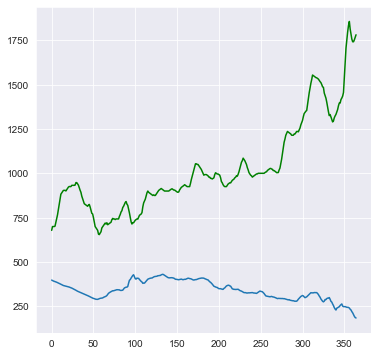

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig, axes = plt.subplots(figsize=(6,6))
sns.lineplot(data= lin_Y_test_predict.tolist(), ax= axes)
sns.lineplot(data= Y_test.tolist(), ax= axes, color = 'green')